<a href="https://colab.research.google.com/github/vivekwisdom/NLP/blob/develop/Sentiment%20Classification/Sentiment_Classification_CNN_LSTM_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Source]('https://keras.io/examples/imdb_cnn_lstm/')

In [0]:
pip install seqeval version_information

In [82]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda, Activation, Conv1D, MaxPooling1D
# from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

from keras.datasets import imdb

print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

%load_ext version_information
%version_information pandas, numpy, keras, tensorflow, sklearn

GPU is available
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
numpy 1.16.5
keras 2.2.5
tensorflow 1.14.0
sklearn 0.21.3
Fri Sep 20 21:13:09 2019 UTC

In [0]:
# Embedding
max_features = 20000
maxlen = 500
embedding_size = 256

In [0]:
# Convolution
kernel_size = 2
filters = 64
pool_size = 2

In [0]:
# LSTM
lstm_output_size = 25

In [0]:
# Training
batch_size = 100 #batch_size is highly sensitive. Only 2 epochs are needed as the dataset is very small.
epochs = 5


In [87]:
print('Loading Full data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading Full data...
25000 train sequences
25000 test sequences


# Simple EDA on Data

In [0]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [89]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [90]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


In [91]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
19998


Review length: 
Mean 234.76 words (172.911495) and median is (176.000000)


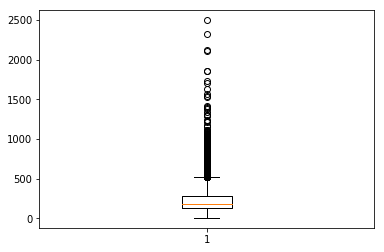

In [92]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f) and median is (%f)" % (np.mean(result), np.std(result), np.median(result)))
# plot review length
# plt.hist(result)
plt.boxplot(result)
plt.show()

In [93]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Pad sequences (samples x time)


In [94]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


## Build Model

In [97]:
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Bidirectional(LSTM(lstm_output_size)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 256)          5120000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 500, 256)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 499, 64)           32832     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50)                18000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_6 (Activation)    (None, 1) 

## Compile the model

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [99]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 354s 14ms/step - loss: 0.4308 - acc: 0.7928 - val_loss: 0.3143 - val_acc: 0.8686
Epoch 2/5
25000/25000 [==============================] - 349s 14ms/step - loss: 0.2003 - acc: 0.9282 - val_loss: 0.2963 - val_acc: 0.8806
Epoch 3/5
25000/25000 [==============================] - 354s 14ms/step - loss: 0.1136 - acc: 0.9633 - val_loss: 0.3510 - val_acc: 0.8687
Epoch 4/5
25000/25000 [==============================] - 352s 14ms/step - loss: 0.0692 - acc: 0.9794 - val_loss: 0.4247 - val_acc: 0.8637
Epoch 5/5
25000/25000 [==============================] - 351s 14ms/step - loss: 0.0474 - acc: 0.9868 - val_loss: 0.4847 - val_acc: 0.8579


In [100]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


25000/25000 [==============================] - 94s 4ms/step
Test score: 0.4847482188642025
Test accuracy: 0.8579199991226196


In [0]:
#Will try agaun later to implement other papers in https://paperswithcode.com/sota/sentiment-analysis-on-imdb